In [276]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [131]:
df_id_pos = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（POSデータ）')
df_id_pos.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


# 5 売り場の評価

## 5.1 集計による売上の評価

In [4]:
df7 = df_id_pos[df_id_pos['日'] <= 7][['大カテゴリ名', '日']]

In [54]:
# 表5.1 日別・大カテゴリ名別販売個数
table_5_1 = df7.groupby(['大カテゴリ名', '日']).size().unstack()
table_5_1 = table_5_1.fillna(0)
table_5_1['合計'] = table_5_1.sum(axis=1)
table_5_1.loc['合計'] = table_5_1.sum(axis=0)
table_5_1

日,1,2,3,4,5,6,7,合計
大カテゴリ名,,,,,,,,
その他,1.0,0.0,3.0,1.0,0.0,0.0,0.0,5.0
乾物類,22.0,28.0,17.0,22.0,16.0,9.0,24.0,138.0
加工食品,363.0,378.0,384.0,395.0,305.0,298.0,344.0,2467.0
即席食品,67.0,62.0,102.0,162.0,54.0,72.0,293.0,812.0
惣菜,272.0,287.0,339.0,364.0,270.0,362.0,306.0,2200.0
水産,137.0,136.0,185.0,156.0,99.0,112.0,140.0,965.0
畜産,203.0,213.0,236.0,228.0,190.0,171.0,262.0,1503.0
穀物類,200.0,157.0,233.0,218.0,157.0,150.0,211.0,1326.0
菓子,395.0,188.0,274.0,248.0,181.0,134.0,242.0,1662.0


In [59]:
# 表5.2 大カテゴリの変動係数(標準偏差／算術平均)
table_5_2 = table_5_1.copy()
table_5_2 = table_5_2.drop(['合計'], axis=1).drop(['合計'], axis=0)
table_5_2['変動係数'] = table_5_2.std(axis=1) / table_5_2.mean(axis=1)
table_5_2 = table_5_2.drop([i for i in range(1, 8)], axis=1)
table_5_2

日,変動係数
大カテゴリ名,
その他,1.328767
乾物類,0.499188
加工食品,0.418512
即席食品,0.881517
惣菜,0.424746
水産,0.453960
畜産,0.428128
穀物類,0.443530
菓子,0.549560


In [60]:
# 表5.3 即席食品のドリルダウン
df7c = df[(df['日'] <= 7) & (df['大カテゴリ名'] == '即席食品')][['中カテゴリ名', '日']]
table_5_3 = df7c.groupby(['中カテゴリ名', '日']).size().unstack()
table_5_3 = table_5_3.fillna(0)
table_5_3

日,1,2,3,4,5,6,7
中カテゴリ名,,,,,,,
その他即席食品,4.0,0.0,0.0,0.0,1.0,2.0,1.0
レトルト惣菜,29.0,30.0,40.0,17.0,15.0,25.0,32.0
レトルト米飯,2.0,5.0,4.0,6.0,6.0,3.0,4.0
冷凍食品,10.0,10.0,12.0,70.0,14.0,18.0,211.0
即席汁物,7.0,6.0,21.0,14.0,6.0,9.0,7.0
即席麺,15.0,11.0,25.0,55.0,12.0,15.0,38.0


## 5.2 売り場の計数管理

In [63]:
df.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


In [109]:
# 表5.4 売上の因数分解

pd.options.display.float_format = '{:.2f}'.format


def add_sales_factorize (df, col, df0):
    sales = df0[['税抜価格']].sum().values[0]
    values = [
        sales,
        df0['顧客ID'].nunique(),
        sales / unique_customer,
        df0['レシートNo'].nunique() / unique_customer,
        sales / df0['レシートNo'].nunique(),
        df0.groupby(['レシートNo']).size().mean(),
        sales / len(df0)
    ]
    print(values)
    df[col] = values

table_5_4 = pd.DataFrame(index=[
    '売上（円）',
    'ユニーク顧客（人）',
    '１人あたり購買金額（円）',
    '来店頻度（回）',
    '１回あたり客単価（円）',
    '買上点数（点）',
    '買上商品単価（円）'
])
df_former_15 = df_id_pos[df_id_pos['日'] <= 15]
df_later_15 = df_id_pos[df_id_pos['日'] > 15]
add_sales_factorize(table_5_4, '１〜１５日', df_former_15)
add_sales_factorize(table_5_4, '１６〜３０日', df_later_15)
table_5_4

[6953035, 877, 7928.204104903079, 3.9566704675028506, 2003.7564841498559, 10.057925072046109, 199.22165553995586]
[6845840, 871, 7805.974914481186, 4.022805017103763, 1940.4308390022675, 9.687641723356009, 200.2996079349289]


,１〜１５日,１６〜３０日
売上（円）,6953035.00,6845840.00
ユニーク顧客（人）,877.00,871.00
１人あたり購買金額（円）,7928.20,7805.97
来店頻度（回）,3.96,4.02
１回あたり客単価（円）,2003.76,1940.43
買上点数（点）,10.06,9.69
買上商品単価（円）,199.22,200.30


In [140]:
# 表5.5 点数PI値上位２０小カテゴリ
customers = df['顧客ID'].nunique()
table_5_5_item = df_id_pos.groupby(['小カテゴリ名']).size() / customers * 1000
table_5_5_item = table_5_5_item.sort_values(ascending=False)
table_5_5_item = table_5_5_item.iloc[:20]
print('点数PI上位２０位\n', table_5_5_item)

print('')

# 表5.5 金額PI値上位２０小カテゴリ
table_5_5_price = df_id_pos.groupby(['小カテゴリ名'])['税抜価格'].sum() / customers * 1000
table_5_5_price = table_5_5_price.sort_values(ascending=False)
table_5_5_price = table_5_5_price.iloc[:20]
print('金額PI上位２０位\n', table_5_5_price)

点数PI上位２０位

金額PI上位２０位
 小カテゴリ名
ブランド豚   414025.00
うるち米    402690.00
寿司惣菜    383485.00
パン惣菜    364365.00
揚物惣菜    319205.00
その他刺身   279675.00
水産塩干し   210620.00
牛乳      205075.00
漬物      182335.00
ひき肉     179075.00
茶系飲料    176380.00
新ジャンル   171235.00
ヨーグルト   169200.00
鶏卵      166000.00
国産鶏     160760.00
菓子パン    157760.00
米飯惣菜    156605.00
サラダ惣菜   155195.00
弁当      152900.00
ビール     147500.00
Name: 税抜価格, dtype: float64


## 5.3 ABC分析による重要カテゴリの評価

### 5.3.1 ABC分析による分析の方法

In [134]:
df_id_pos.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


In [150]:
# 表5.6 大カテゴリのABC分析
def rank(s):
    if s <= 60:
        return 'A'
    elif s <= 90:
        return 'B'
    else:
        return 'C'
    
total = len(df_id_pos)
table_5_6 = df_id_pos.groupby(['大カテゴリ名']).size()
table_5_6 = table_5_6.sort_values(ascending=False)
table_5_6 = pd.DataFrame(table_5_6, columns = ['販売個数'])
table_5_6['構成比率'] = table_5_6['販売個数'] / len(df_id_pos) * 100
table_5_6['累積構成比率'] = table_5_6['構成比率'].cumsum()
table_5_6['ランク'] = table_5_6['累積構成比率'].map(rank)
table_5_6

,販売個数,構成比率,累積構成比率,ランク
大カテゴリ名,,,,
農産,12593,18.23,18.23,A
加工食品,10839,15.69,33.92,A
惣菜,9421,13.64,47.56,A
菓子,7416,10.74,58.29,A
飲料,6538,9.46,67.76,B
畜産,6451,9.34,77.10,B
穀物類,5510,7.98,85.07,B
水産,4376,6.33,91.41,C
即席食品,3408,4.93,96.34,C


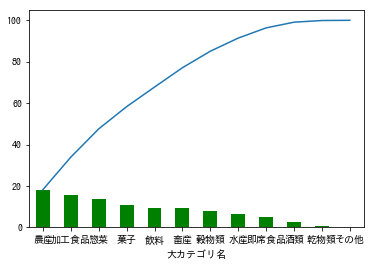

In [190]:
# 図5.4 大カテゴリのパレート図
graph_5_4 = table_5_6
ax = graph_5_4['構成比率'].plot.bar(color='green')
graph_5_4['累積構成比率'].plot(ax=ax)

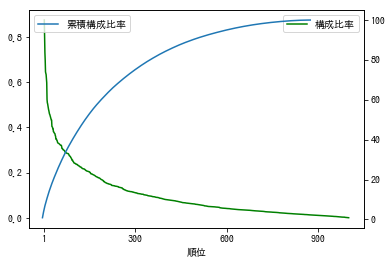

In [186]:
# 図5.5 顧客別購買金額のパレート図

pd.options.display.float_format = '{:.3f}'.format

graph_5_5 = df_id_pos.groupby(['顧客ID'])['税抜価格'].sum()
graph_5_5 = graph_5_5.sort_values(ascending=False)
graph_5_5 = pd.DataFrame(graph_5_5)
graph_5_5['構成比率'] = graph_5_5['税抜価格'] / graph_5_5['税抜価格'].sum() * 100
graph_5_5['累積構成比率'] = graph_5_5['構成比率'].cumsum()
graph_5_5['順位'] = range(1, df_id_pos['顧客ID'].nunique() + 1)
graph_5_5 = graph_5_5.set_index('順位')

xticks=[1, 300, 600, 900, 1200]
ax = graph_5_5['構成比率'].plot(color='green', xticks=xticks, legend=True)
graph_5_5['累積構成比率'].plot(ax=ax.twinx(), xticks=xticks, legend=True)

### 5.3.2 Gini係数

In [218]:
# 表 5.4のGini係数
cumsum = graph_5_4['累積構成比率'] / 100
cumsum = cumsum.values.tolist()
cumsum.insert(0, 0)  # 左端は0スタート
n = len(cumsum)
span = 1 / (n - 1)  # 植木算
s = 0
for i in range(1, n):
    s += (cumsum[i] + cumsum[i - 1] ) * span / 2
gini = (s - 0.5) / 0.5
gini

0.374458952793179

## 5.4 吸引力モデルによる商圏分析

吸引力モデルの一種で商圏評価のモデルであるバフモデルにおいては、顧客$i$が店舗$j$を選択確率する確率$p_{ij}$は店舗の面積$S_j$と顧客$i$と店舗$j$の距離$d_{ij}$を用いて
$$
p_{ij} = \frac{ \frac{S_j}{d^\lambda_{ij}} }{ \sum^m_{k=1} \frac{S_k}{d^\lambda_{ik}} }
$$
と表される。$\lambda$は交通抵抗パラメータとよばれる。

In [225]:
# 店舗の座標と面積
shops = pd.DataFrame([[-3, -3, 3000], [0, 3, 5000], [5, -5, 10000]],
    index=['店舗A', '店舗B', '店舗C'], columns=['x', 'y', 'S'])
shops

,x,y,S
店舗A,-3,-3,3000
店舗B,0,3,5000
店舗C,5,-5,10000


In [226]:
# 住宅区域の座標と人数
regidents = pd.DataFrame([
    [-8, 5, 1000],
    [-7, -8, 1000],
    [-3, 4, 3000],
    [3, -3, 5000],
    [7, 7, 4000],
    [7, 0, 6000]
], index=['地域1', '地域2', '地域3', '地域4', '地域5', '地域6'],
   columns=['x', 'y', 'N'])
regidents

,x,y,N
地域1,-8,5,1000
地域2,-7,-8,1000
地域3,-3,4,3000
地域4,3,-3,5000
地域5,7,7,4000
地域6,7,0,6000


In [241]:
# 店舗選択確率の比から期待集客数を求める
huff = pd.DataFrame(index=regidents.index, columns=shops.index)

# ハフモデル
for s in huff.columns:
    huff[s] = shops.loc[s].S / ((regidents.x - shops.loc[s].x) ** 2 + (regidents.y - shops.loc[s].y) ** 2)
# 地域毎に割合化
for s in huff.index:
    huff.loc[s] = huff.loc[s] / huff.loc[s].sum() #
huff['N'] = regidents.N
huff

,店舗A,店舗B,店舗C,N
地域1,0.233,0.509,0.257,1000
地域2,0.436,0.175,0.389,1000
地域3,0.097,0.793,0.109,3000
地域4,0.058,0.077,0.865,5000
地域5,0.094,0.482,0.424,4000
地域6,0.060,0.188,0.752,6000


In [246]:
print('期待集客数')
for c in shops.index:
    # 地域の人数 * 店舗に来る割合
    
    print(c, (huff.N * huff[c]).sum())

期待集客数
店舗A 1985.345750497359
店舗B 6506.338254264321
店舗C 11508.315995238321


## 5.5 回帰分析による売上予測

### 5.5.1 単回帰分析

回帰係数 [-0.54664566]
切片 332.82098664551256
決定係数 0.08758324438358511


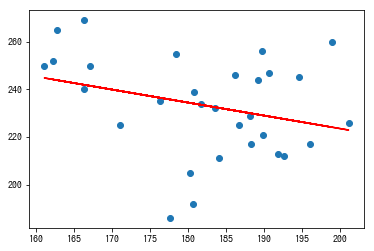

In [294]:
# 日々の商品単価を説明変数、来店客数を目的変数とした回帰分析
avg_unit_price = df_id_pos.groupby('日')['税抜単価'].mean().values.reshape(-1, 1)
visits = df_id_pos.groupby('日')['顧客ID'].nunique().values

model = LinearRegression()
model.fit(avg_unit_price, visits)
print('回帰係数', model.coef_)
print('切片', model.intercept_)
print('決定係数', model.score(avg_unit_price, visits))  # 小さすぎない？

plt.scatter(avg_unit_price, visits)
plt.plot(avg_unit_price, model.predict(avg_unit_price), color='red')

### 5.5.2 重回帰分析

In [297]:
# 日々の商品単価、曜日（日 mod 7）を説明変数、来店客数を目的変数とした回帰分析
X = pd.DataFrame()
X['税抜単価'] = df_id_pos.groupby('日')['税抜単価'].mean()
X['曜日'] = df_id_pos['日'].unique() % 7
X = X.loc[:].values
y = df_id_pos.groupby('日')['顧客ID'].nunique().values

model = LinearRegression()
model.fit(X, y)

print('回帰係数', model.coef_)
print('切片', model.intercept_)
print('決定係数', model.score(X, y))  # 小さすぎない？

回帰係数 [-0.72728059 -4.10522186]
切片 377.62310321494215
決定係数 0.23450838289377596


In [292]:
1

1